In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# General Information about Data Sets

In [2]:
train2= pd.read_csv('cleaned_train.csv')
weather= pd.read_csv('cleaned_weather.csv')
spray2= pd.read_csv('cleaned_spray.csv')
train= train2.drop(['Year','Month','Day'], axis=1)
spray= spray2.drop(['Year','YearMonth','Day','YearWeek','Month'], axis=1)
train['Date']=pd.to_datetime(train['Date'])
spray['Date']=pd.to_datetime(spray['Date'])
weather['Date']=pd.to_datetime(weather['Date'])
weather['YearWeek']= (weather['Year'].astype(str)+weather['Week'].astype(str)).astype('int64')
weather['YearMonth']=(weather['Year'].astype(str)+weather['Month'].astype(str)).astype('int64')
weather.drop(['Week','Day'], axis=1, inplace=True)

In [3]:
print(train.info(),weather.info(),spray.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9693 non-null   datetime64[ns]
 1   Species       9693 non-null   object        
 2   Latitude      9693 non-null   float64       
 3   Longitude     9693 non-null   float64       
 4   NumMosquitos  9693 non-null   int64         
 5   WnvPresent    9693 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 454.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1472 non-null   datetime64[ns]
 1   Tmax         1472 non-null   int64         
 2   Tmin         1472 non-null   int64         
 3   Tavg         1472 non-null   int64         
 4   Depar

In [4]:
train.head()

,Date,Species,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,4,0


In [5]:
spray.head()

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [6]:
weather.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,YearWeek,YearMonth
0,2007-05-01,83,51,67,14.0,51.0,56.5,0.0,2.5,0.0,29.140,29.820,2.20,26.0,9.40,2007,5,200718,20075
1,2007-05-02,59,42,51,-3.0,42.0,47.0,13.5,0.0,0.0,29.410,30.085,13.15,3.0,13.40,2007,5,200718,20075
2,2007-05-03,66,47,57,2.0,40.0,49.0,8.0,0.0,0.0,29.425,30.120,12.30,6.5,12.55,2007,5,200718,20075
3,2007-05-04,72,50,61,4.0,41.5,50.0,4.0,0.0,0.0,29.335,30.045,10.25,7.5,10.60,2007,5,200718,20075
4,2007-05-05,66,53,60,5.0,38.5,49.5,5.0,0.0,0.0,29.430,30.095,11.45,7.0,11.75,2007,5,200718,20075


# Weather & Train Data Sets - EDA and Feature Engineering

According to the researches, if the weather gets too hot and too dry, mosquitoes will not be as active and feeding as they usually are. But once the humidity increases they’re more hungry and biting more.Therefore humidity plays a key role in WVN Presence. We will add the relative humidity as a feature.

In [7]:
# calculation of RELATIVE HUMIDITY
def rel_humidity(df,T, Td,Tw):
    
# Convert the air temperature and dew-point temperature to Celsius.(C=5*(F-32)/9)
    Tc= (5.0*(df[T]-32))/9.0
    Tdc= (5.0*(df[Td]-32))/9.0

#Calculate the saturated vapor pressure with a formula.  
    es=6.11*10.0**(7.5*Tc/(237.7+Tc))

#Find the actual vapor pressure with the same formula.
    e=6.11*10.0**(7.5*Tdc/(237.7+Tdc))
    
#Calculate the relative humidity.    
    df['RelHumidity']= round((e/es)*100)
    return df

In [8]:
rel_humidity(weather,'Tavg','DewPoint', 'WetBulb')

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,YearWeek,YearMonth,RelHumidity
0,2007-05-01,83,51,67,14.0,51.0,56.5,0.0,2.5,0.000,29.140,29.820,2.20,26.0,9.40,2007,5,200718,20075,56.0
1,2007-05-02,59,42,51,-3.0,42.0,47.0,13.5,0.0,0.000,29.410,30.085,13.15,3.0,13.40,2007,5,200718,20075,71.0
2,2007-05-03,66,47,57,2.0,40.0,49.0,8.0,0.0,0.000,29.425,30.120,12.30,6.5,12.55,2007,5,200718,20075,53.0
3,2007-05-04,72,50,61,4.0,41.5,50.0,4.0,0.0,0.000,29.335,30.045,10.25,7.5,10.60,2007,5,200718,20075,49.0
4,2007-05-05,66,53,60,5.0,38.5,49.5,5.0,0.0,0.000,29.430,30.095,11.45,7.0,11.75,2007,5,200718,20075,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,78,52,65,16.0,51.5,58.5,0.5,1.0,0.010,28.960,29.665,12.35,19.0,13.25,2014,10,201444,201410,62.0
1468,2014-10-28,67,46,57,10.0,39.0,47.5,8.0,0.0,0.025,29.190,29.850,14.40,26.0,15.10,2014,10,201444,201410,51.0
1469,2014-10-29,49,38,44,-4.0,33.0,41.0,21.0,0.0,0.000,29.390,30.065,9.00,29.0,9.45,2014,10,201444,201410,65.0
1470,2014-10-30,52,34,43,-4.0,34.5,41.0,21.5,0.0,0.000,29.375,30.095,5.50,23.5,6.00,2014,10,201444,201410,72.0


I will calculate time lags by giving higher weights to the most recent observed values.

In [9]:
def ema(df,col, span):
    df[f'{col}_{span}']= round(df[col].ewm(span=span, adjust=True).mean(),2)
    return df
ema_list= ['Tmax', 'DewPoint','WetBulb','PrecipTotal', 'StnPressure','SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed','RelHumidity']
span= [7,14]
for i in ema_list:
    ema(weather,i, 7)
    ema(weather,i, 14)

In [10]:
weather.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,...,SeaLevel_7,SeaLevel_14,ResultSpeed_7,ResultSpeed_14,ResultDir_7,ResultDir_14,AvgSpeed_7,AvgSpeed_14,RelHumidity_7,RelHumidity_14
0,2007-05-01,83,51,67,14.0,51.0,56.5,0.0,2.5,0.0,...,29.82,29.82,2.20,2.20,26.00,26.00,9.40,9.40,56.00,56.00
1,2007-05-02,59,42,51,-3.0,42.0,47.0,13.5,0.0,0.0,...,29.97,29.96,8.46,8.07,12.86,13.68,11.69,11.54,64.57,64.04
2,2007-05-03,66,47,57,2.0,40.0,49.0,8.0,0.0,0.0,...,30.04,30.02,10.12,9.68,10.11,10.94,12.06,11.93,59.57,59.82
3,2007-05-04,72,50,61,4.0,41.5,50.0,4.0,0.0,0.0,...,30.04,30.03,10.17,9.86,9.15,9.89,11.53,11.52,55.70,56.51
4,2007-05-05,66,53,60,5.0,38.5,49.5,5.0,0.0,0.0,...,30.06,30.05,10.59,10.27,8.45,9.13,11.60,11.58,52.19,53.51


In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1472 non-null   datetime64[ns]
 1   Tmax            1472 non-null   int64         
 2   Tmin            1472 non-null   int64         
 3   Tavg            1472 non-null   int64         
 4   Depart          1472 non-null   float64       
 5   DewPoint        1472 non-null   float64       
 6   WetBulb         1472 non-null   float64       
 7   Heat            1472 non-null   float64       
 8   Cool            1472 non-null   float64       
 9   PrecipTotal     1472 non-null   float64       
 10  StnPressure     1472 non-null   float64       
 11  SeaLevel        1472 non-null   float64       
 12  ResultSpeed     1472 non-null   float64       
 13  ResultDir       1472 non-null   float64       
 14  AvgSpeed        1472 non-null   float64       
 15  Year

In [12]:
w_train= train.merge(weather, on=['Date'])
w_train.head()

,Date,Species,Latitude,Longitude,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,...,SeaLevel_7,SeaLevel_14,ResultSpeed_7,ResultSpeed_14,ResultDir_7,ResultDir_14,AvgSpeed_7,AvgSpeed_14,RelHumidity_7,RelHumidity_14
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0,88,62,75,10.0,...,30.11,30.11,6.72,7.55,15.58,15.53,8.31,9.2,56.31,54.16
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,1,0,88,62,75,10.0,...,30.11,30.11,6.72,7.55,15.58,15.53,8.31,9.2,56.31,54.16
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,1,0,88,62,75,10.0,...,30.11,30.11,6.72,7.55,15.58,15.53,8.31,9.2,56.31,54.16
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,1,0,88,62,75,10.0,...,30.11,30.11,6.72,7.55,15.58,15.53,8.31,9.2,56.31,54.16
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,4,0,88,62,75,10.0,...,30.11,30.11,6.72,7.55,15.58,15.53,8.31,9.2,56.31,54.16


**The below chart indicates CULEX RESTUANS species were most affected by temperature increases.**

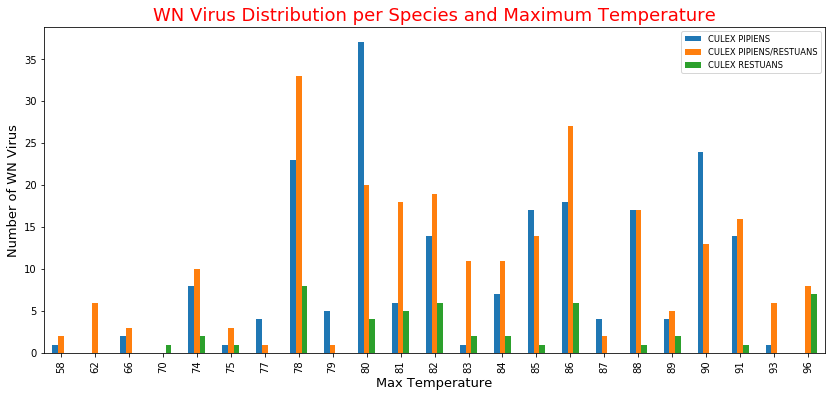

In [13]:
Virus_Species_Month=w_train[w_train['WnvPresent']==1].groupby(['Tmax'])['Species'].value_counts().unstack().fillna(0)
Virus_Species_Month.plot.bar(figsize=(14,6))
plt.grid(False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='small')
plt.xlabel('Max Temperature', fontsize=13)
plt.ylabel('Number of WN Virus', fontsize=13)
plt.title('WN Virus Distribution per Species and Maximum Temperature', fontsize=18, color='red')
plt.show() 

In [14]:
w_train=pd.get_dummies(w_train,drop_first=True)
w_train.head()

,Date,Latitude,Longitude,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,DewPoint,...,AvgSpeed_7,AvgSpeed_14,RelHumidity_7,RelHumidity_14,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
0,2007-05-29,41.954690,-87.800991,1,0,88,62,75,10.0,58.5,...,8.31,9.2,56.31,54.16,0,1,0,0,0,0
1,2007-05-29,41.954690,-87.800991,1,0,88,62,75,10.0,58.5,...,8.31,9.2,56.31,54.16,0,0,1,0,0,0
2,2007-05-29,41.994991,-87.769279,1,0,88,62,75,10.0,58.5,...,8.31,9.2,56.31,54.16,0,0,1,0,0,0
3,2007-05-29,41.974089,-87.824812,1,0,88,62,75,10.0,58.5,...,8.31,9.2,56.31,54.16,0,1,0,0,0,0
4,2007-05-29,41.974089,-87.824812,4,0,88,62,75,10.0,58.5,...,8.31,9.2,56.31,54.16,0,0,1,0,0,0


In [15]:
print('\n','The Percantage of Virus per Each Species  ','\n')
print('CULEX PIPIENS: ', round(w_train[w_train.WnvPresent==1]['Species_CULEX PIPIENS'].sum()/len(w_train[w_train.WnvPresent==1]['Species_CULEX PIPIENS'])*100,2))
print('CULEX RESTUANS: ', round(w_train[w_train.WnvPresent==1]['Species_CULEX RESTUANS'].sum()/len(w_train[w_train.WnvPresent==1]['Species_CULEX RESTUANS'])*100,2))
print('CULEX PIPIENS/RESTUANS: ', round(w_train[w_train.WnvPresent==1]['Species_CULEX PIPIENS/RESTUANS'].sum()/len(w_train[w_train.WnvPresent==1]['Species_CULEX PIPIENS/RESTUANS'])*100),2)


 The Percantage of Virus per Each Species   

CULEX PIPIENS:  41.35
CULEX RESTUANS:  9.74
CULEX PIPIENS/RESTUANS:  49.0 2


**The below Correlation report indicates Relative Humidity is highly correlated with WN Virus, consequently Dew Temperature and Wet Bulb. Also their 7 and 14 days Exponential Mean Averages have higher correlation than the actual observation values. This must be because of the incubation period.**

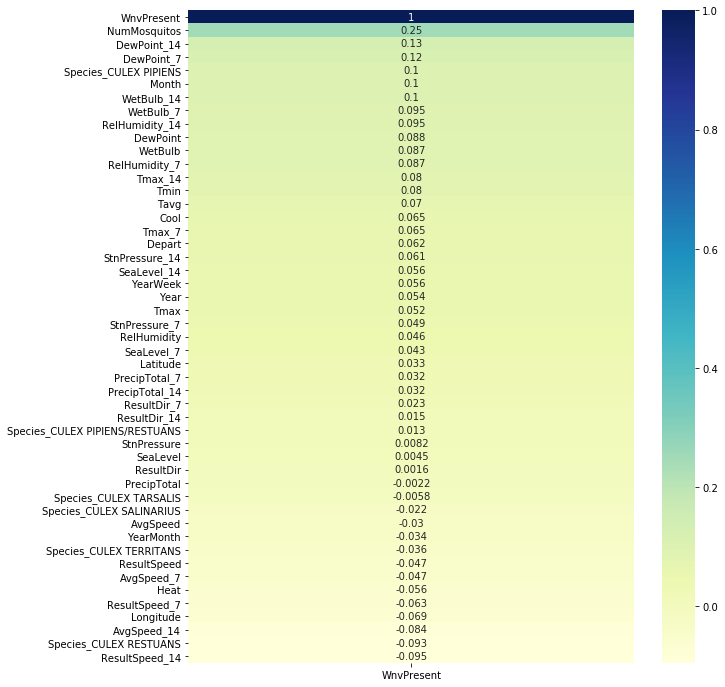

In [21]:
figure = plt.figure(figsize=(10,12))
sns.heatmap(w_train.corr()[['WnvPresent']].sort_values('WnvPresent',ascending=False),annot=True, cmap='YlGnBu')

**We will check if there is multicollinearity among the features and fix them.**

**WHY SO HIGH ???**

In [22]:
w_train.drop(['Date'], axis=1, inplace=True)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [int(variance_inflation_factor(w_train.values, i)) for i in range(len(w_train.columns))]
vif["features"] = w_train.columns
vif

,VIF Factor,features
0,274553,Latitude
1,1386231,Longitude
2,1,NumMosquitos
3,1,WnvPresent
4,48824,Tmax
5,28138,Tmin
6,213626,Tavg
7,39,Depart
8,77083,DewPoint
9,2475,WetBulb


# Spray & Train Data

**Virus have been found in most of the trap locations. However spraying doesn't cover the entre trap and virus locations.**

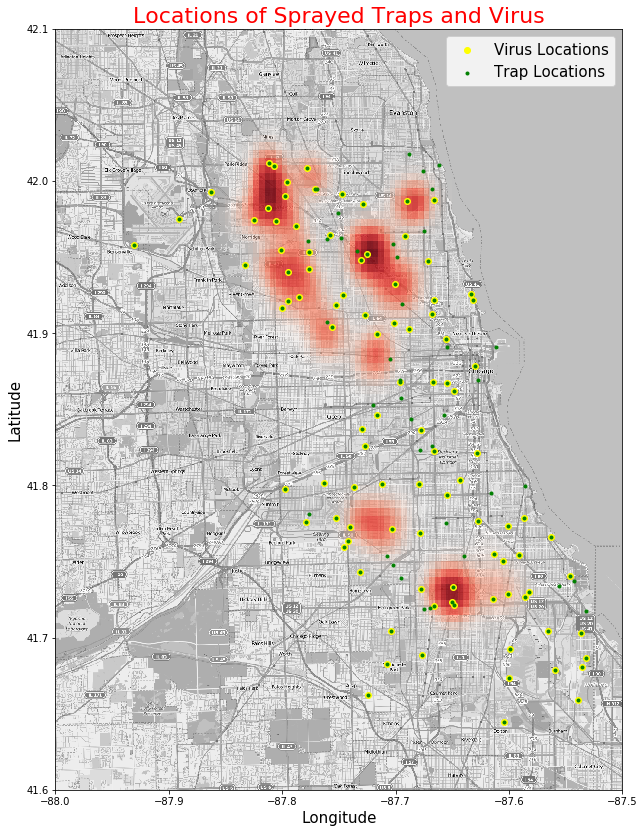

In [23]:
from sklearn.neighbors import KernelDensity
mapdata = np.loadtxt("mapdata_copyright_openstreetmap_contributors.txt")
traps = train[['Date','Longitude', 'Latitude', 'WnvPresent','NumMosquitos']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

spray_loc= spray[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.010)
kd.fit(spray_loc)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

plt.figure(figsize=(18,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv,origin='lower',cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

virus_loc = train[train['WnvPresent']==1][['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(virus_loc[:,0], virus_loc[:,1], marker='o', color='yellow', label='Virus Locations')
trap_loc = train[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_loc[:,0], trap_loc[:,1], marker='.', color='green', label='Trap Locations')
plt.legend(fontsize=15)
plt.title('Locations of Sprayed Traps and Virus', fontsize=22, color='red')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()